逻辑回归:根据学生的两门成绩,预测该学生是否会被大学录取

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex2-logistic regression\ex2data1.txt",header=None,names=['exam1','exam2','accepted'])
fig,ax=plt.subplots()
ax.scatter(data[data['accepted']==0]['exam1'],data[data['accepted']==0]['exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['accepted']==1]['exam1'],data[data['accepted']==1]['exam2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
plt.show()

data[data['accepted']==0]：这里的 data 应该是一个 pandas 的 DataFrame 对象，data['accepted'] 是 DataFrame 中的一列，用于表示某种分类（例如是否录取）。data['accepted']==0 是一个布尔条件，用于筛选出 'accepted' 列中值为 0 的行。所以 data[data['accepted']==0] 会返回一个新的 DataFrame，包含了所有 'accepted' 列值为 0 的行。
data[data['accepted']==0]['exam1'] 和 data[data['accepted']==0]['exam2']：这两个表达式分别从筛选出的 'accepted' 列值为 0 的 DataFrame 中提取 'exam1' 和 'exam2' 两列的数据，作为散点图的 x 轴和 y 轴坐标。所以这组数据绘制的是 'accepted' 为 0 的样本点。

In [ ]:
data.insert(0,'ones',1)
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]
x=np.array(x)
y=np.array(y)
y=y.reshape(100,1)

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def costFunction(x,y,theta):
    z=x@theta
    a=sigmoid(z)
    inner1=y*np.log(a)
    inner2=(1-y)*np.log(1-a)
    return -np.sum((inner1+inner2))/len(x)
theta=np.zeros((3,1))

In [ ]:
def tidu(x,y,theta,a,c):
    costs=[]
    for i in range(c):
        A=sigmoid(x@theta)
        theta=theta-a*(x.T@(A-y))/len(x)
        costs.append(costFunction(x,y,theta))
        if i%100==0:
            print(costFunction(x,y,theta))
    return theta,costs
a=0.001
c=3000000

In [ ]:
theta,costs=tidu(x,y,theta,a,c)
fig,ax=plt.subplots()
ax.plot(np.arange(c),costs)
ax.set(xlabel='dedai',ylabel='cost')
plt.show()

生成预测值:
将sigmoid的预测值设定阀门转化成0或1
准确率：是指分类模型正确预测的样本数量占总样本数量的比例
np.mean() 是 numpy 库中的函数，用于计算数组元素的平均值。当传入一个布尔型数组时，numpy 会将 True 视为 1 ，False 视为 0 ，然后计算这些 0 和 1 的平均值。
对于上述例子中的 np.array([True, False, True]) ，转换为 [1, 0, 1] 后，计算平均值 (1 + 0 + 1) / 3 ，结果为 2 / 3 （约为 0.667 ）

In [ ]:
def predict(x,theta):
    p=[]
    pr=sigmoid(x@theta)
    for i in pr:
        if i>0.5:
            p.append(1)
        else:
            p.append(0)
    return p    
y_=np.array(predict(x,theta))
y_=y_.reshape(len(y_),1)
acc=np.mean(y_==y)
print(acc)           

确定决策边界:
因为准确率为0.86较高
阀值默认为0.5
所以:x@theta=0
所以x2=-theta0/theta2-theta1/theta2*x1

In [ ]:
x1=np.linspace(20,100,100)
x2=-theta[0,0]/theta[2,0]-theta[1,0]/theta[2,0]*x1
fig,ax=plt.subplots()
ax.scatter(data[data['accepted']==0]['exam1'],data[data['accepted']==0]['exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['accepted']==1]['exam1'],data[data['accepted']==1]['exam2'],c='b',marker='o',label='y=1')
ax.plot(x1,x2,label='bianjie')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
plt.show()

                                                         LogisticRegression

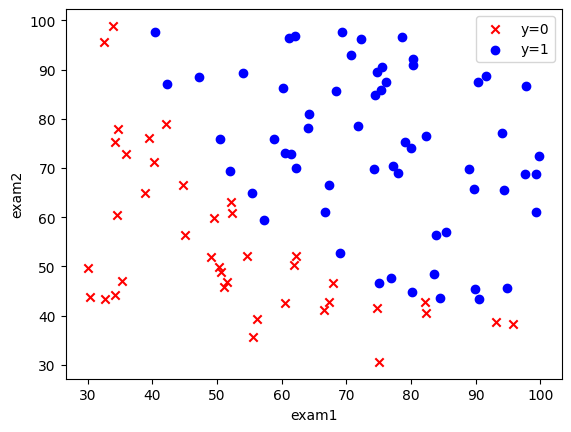

0.875
0.95


C:\Users\HP\AppData\Local\Temp\ipykernel_44644\1202116844.py:34: UserWarning: The following kwargs were not used by contour: 'label'
  ax[0].contour(x1_train,x2_train,z_train,label='bianjie')
C:\Users\HP\AppData\Local\Temp\ipykernel_44644\1202116844.py:37: UserWarning: The following kwargs were not used by contour: 'label'
  ax[1].contour(x1_test,x2_test,z_test,label='bianjie')


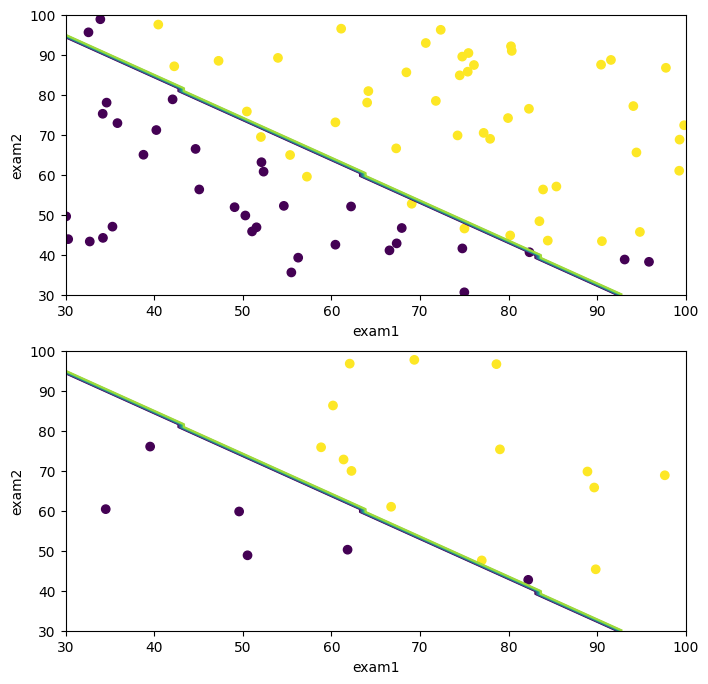

In [3]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as  plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
data=pd.read_csv(r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex2-logistic regression\ex2data1.txt",header=None,names=['exam1','exam2','accepted'])
fig,ax=plt.subplots()
ax.scatter(data[data['accepted']==0]['exam1'],data[data['accepted']==0]['exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['accepted']==1]['exam1'],data[data['accepted']==1]['exam2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
plt.show()
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=60
)
model=LogisticRegression(C=1.0)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
x1_train=np.linspace(30,100,100)
x1_train,x2_train=np.meshgrid(x1_train,x1_train)
z_train=model.predict(np.c_[x1_train.ravel(),x2_train.ravel()])
z_train=z_train.reshape(x1_train.shape)
x1_test=np.linspace(30,100,100)
x1_test,x2_test=np.meshgrid(x1_test,x1_test)
z_test=model.predict(np.c_[x1_test.ravel(),x2_test.ravel()])
z_test=z_test.reshape(x1_test.shape)
fig,ax=plt.subplots(2,1,figsize=(8,8))
ax[0].scatter(x_train[:,0],x_train[:,1],c=y_train)
ax[0].contour(x1_train,x2_train,z_train,label='bianjie')
ax[0].set(xlabel='exam1',ylabel='exam2')
ax[1].scatter(x_test[:,0],x_test[:,1],c=y_test)
ax[1].contour(x1_test,x2_test,z_test,label='bianjie')
ax[1].set(xlabel='exam1',ylabel='exam2')
plt.show()

                                                                svc

In [ ]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as  plt 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
data=pd.read_csv(r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex2-logistic regression\ex2data1.txt",header=None,names=['exam1','exam2','accepted'])
fig,ax=plt.subplots()
ax.scatter(data[data['accepted']==0]['exam1'],data[data['accepted']==0]['exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['accepted']==1]['exam1'],data[data['accepted']==1]['exam2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
plt.show()
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=75
)
p={'C':[1.0,2,4,5,6,7],'kernel':['linear','rbf'],'gamma':[10,12,30,2,64,50,24]}
g=GridSearchCV(SVC(),p,cv=5)
g.fit(x_train,y_train)
print(g.best_params_)
print(g.best_score_)
model=SVC(C=1.0,kernel='linear')
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
x1_train=np.linspace(30,100,100)
x1_train,x2_train=np.meshgrid(x1_train,x1_train)
z_train=model.predict(np.c_[x1_train.ravel(),x2_train.ravel()])
z_train=z_train.reshape(x1_train.shape)
x1_test=np.linspace(30,100,100)
x1_test,x2_test=np.meshgrid(x1_test,x1_test)
z_test=model.predict(np.c_[x1_test.ravel(),x2_test.ravel()])
z_test=z_test.reshape(x1_test.shape)
fig,ax=plt.subplots(2,1,figsize=(8,8))
ax[0].scatter(x_train[:,0],x_train[:,1],c=y_train)
ax[0].contour(x1_train,x2_train,z_train,label='bianjie')
ax[0].set(xlabel='exam1',ylabel='exam2')
ax[1].scatter(x_test[:,0],x_test[:,1],c=y_test)
ax[1].contour(x1_test,x2_test,z_test,label='bianjie')
ax[1].set(xlabel='exam1',ylabel='exam2')
plt.show()

                                                              决策树

In [ ]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as  plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
data=pd.read_csv(r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex2-logistic regression\ex2data1.txt",header=None,names=['exam1','exam2','accepted'])
fig,ax=plt.subplots()
ax.scatter(data[data['accepted']==0]['exam1'],data[data['accepted']==0]['exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['accepted']==1]['exam1'],data[data['accepted']==1]['exam2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
plt.show()
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=75
)
p={'max_depth':[2,3,4,5,6,7,8,9],'min_samples_leaf':[2,3,4,5,6,7,8,9],'min_samples_split':[2,3,4,5,6,7,8,9]}
g=GridSearchCV(DecisionTreeClassifier(),p,cv=5)
g.fit(x_train,y_train)
print(g.best_params_)
print(g.best_score_)
model=DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=42,
    class_weight='balanced'
)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
x1_train=np.linspace(30,100,100)
x1_train,x2_train=np.meshgrid(x1_train,x1_train)
z_train=model.predict(np.c_[x1_train.ravel(),x2_train.ravel()])
z_train=z_train.reshape(x1_train.shape)
x1_test=np.linspace(30,100,100)
x1_test,x2_test=np.meshgrid(x1_test,x1_test)
z_test=model.predict(np.c_[x1_test.ravel(),x2_test.ravel()])
z_test=z_test.reshape(x1_test.shape)
fig,ax=plt.subplots(2,1,figsize=(8,8))
ax[0].scatter(x_train[:,0],x_train[:,1],c=y_train)
ax[0].contour(x1_train,x2_train,z_train,label='bianjie')
ax[0].set(xlabel='exam1',ylabel='exam2')
ax[1].scatter(x_test[:,0],x_test[:,1],c=y_test)
ax[1].contour(x1_test,x2_test,z_test,label='bianjie')
ax[1].set(xlabel='exam1',ylabel='exam2')
plt.show()

                                                               随机森林

In [ ]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as  plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
data=pd.read_csv(r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex2-logistic regression\ex2data1.txt",header=None,names=['exam1','exam2','accepted'])
fig,ax=plt.subplots()
ax.scatter(data[data['accepted']==0]['exam1'],data[data['accepted']==0]['exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['accepted']==1]['exam1'],data[data['accepted']==1]['exam2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
plt.show()
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=75
)
p={'max_depth':[2,3,4,5,6,7,8,9],'min_samples_leaf':[2,3,4,5,6,7,8,9],'min_samples_split':[2,3,4,5,6,7,8,9],'n_estimators':[200,300,400,100,250]}
#g=GridSearchCV(RandomForestClassifier(),p,cv=5)
model=RandomForestClassifier(
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=3,
    random_state=42,
    class_weight='balanced',
    n_estimators=400
)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
x1_train=np.linspace(30,100,100)
x1_train,x2_train=np.meshgrid(x1_train,x1_train)
z_train=model.predict(np.c_[x1_train.ravel(),x2_train.ravel()])
z_train=z_train.reshape(x1_train.shape)
x1_test=np.linspace(30,100,100)
x1_test,x2_test=np.meshgrid(x1_test,x1_test)
z_test=model.predict(np.c_[x1_test.ravel(),x2_test.ravel()])
z_test=z_test.reshape(x1_test.shape)
fig,ax=plt.subplots(2,1,figsize=(8,8))
ax[0].scatter(x_train[:,0],x_train[:,1],c=y_train)
ax[0].contour(x1_train,x2_train,z_train,label='bianjie')
ax[0].set(xlabel='exam1',ylabel='exam2')
ax[1].scatter(x_test[:,0],x_test[:,1],c=y_test)
ax[1].contour(x1_test,x2_test,z_test,label='bianjie')
ax[1].set(xlabel='exam1',ylabel='exam2')
plt.show()